In [43]:
#importing required libraries
import os
import random
from PIL import Image

#path of images
train_cat_path = "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\train\\cat"
train_dog_path = "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\train\\dog"
test_cat_path = "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\test\\cat"
test_dog_path = "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\test\\dog"

Train Cat:


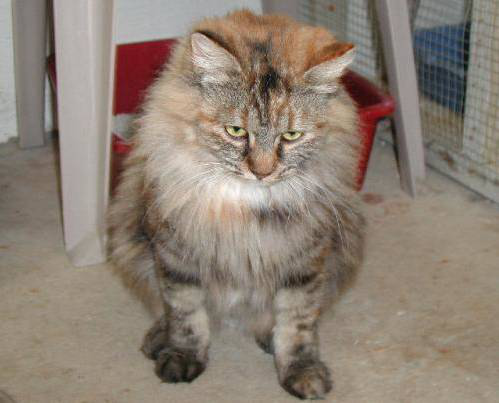

Train Dog:


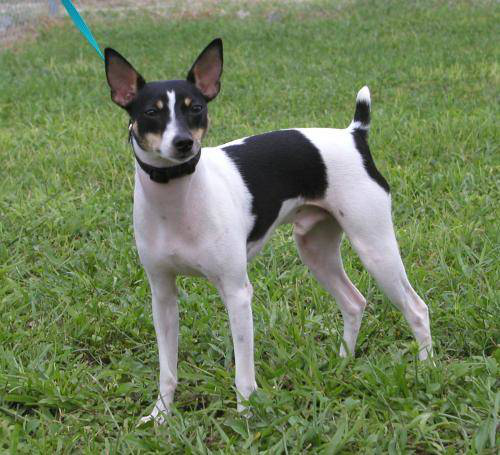

Test Cat:


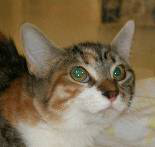

Test Dog:


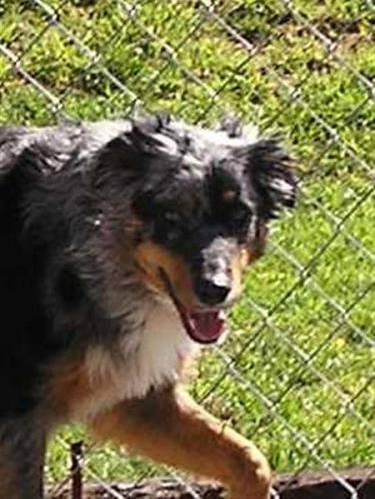

In [44]:
from IPython.display import display

# Function to get all file names in a folder
def get_image_files(folder_path):
    return [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

# Function to open a random image from a list of file paths using PIL and display it in the notebook with a label
def open_and_display_random_image_with_label(file_paths, label):
    selected_image_path = random.choice(file_paths)
    image = Image.open(selected_image_path)
    print(f'{label}:')
    display(image)

# Get all images for cats and dogs in train and test folders
train_cat_images = get_image_files(train_cat_path)
train_dog_images = get_image_files(train_dog_path)
test_cat_images = get_image_files(test_cat_path)
test_dog_images = get_image_files(test_dog_path)

#randomly opening images from each folder
open_and_display_random_image_with_label(train_cat_images, 'Train Cat')
open_and_display_random_image_with_label(train_dog_images, 'Train Dog')
open_and_display_random_image_with_label(test_cat_images, 'Test Cat')
open_and_display_random_image_with_label(test_dog_images, 'Test Dog')

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image size and batch size
img_width, img_height = 150, 150
batch_size = 32

#Data preprocessing and rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

#Prepare train and test generators
train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\rawat\\Downloads\\cats_dogs_dataset\\dataset\\test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
#giving epoach and fitting model
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
31/31 [==============================] - 33s 962ms/step - loss: 0.7183 - accuracy: 0.5302 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 2/10
31/31 [==============================] - 29s 924ms/step - loss: 0.6661 - accuracy: 0.5496 - val_loss: 0.6492 - val_accuracy: 0.5833
Epoch 3/10
31/31 [==============================] - 29s 929ms/step - loss: 0.6350 - accuracy: 0.6023 - val_loss: 0.6319 - val_accuracy: 0.6380
Epoch 4/10
31/31 [==============================] - 29s 933ms/step - loss: 0.5965 - accuracy: 0.6560 - val_loss: 0.5870 - val_accuracy: 0.6979
Epoch 5/10
31/31 [==============================] - 30s 957ms/step - loss: 0.5905 - accuracy: 0.6777 - val_loss: 0.6196 - val_accuracy: 0.6979
Epoch 6/10
31/31 [==============================] - 30s 954ms/step - loss: 0.5062 - accuracy: 0.7376 - val_loss: 0.6287 - val_accuracy: 0.6667
Epoch 7/10
31/31 [==============================] - 30s 966ms/step - loss: 0.4436 - accuracy: 0.7883 - val_loss: 0.6142 - val_accuracy: 0.6979

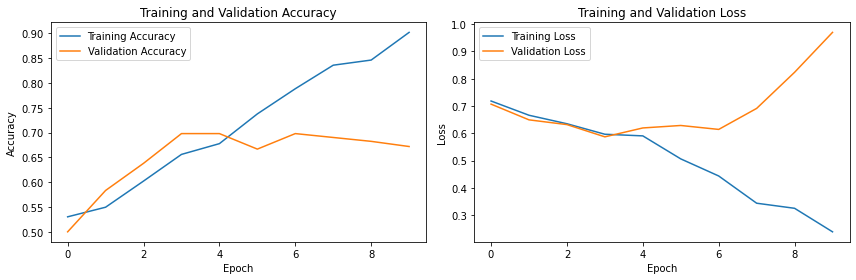

In [48]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
#saving the model
model.save('C:\\Users\\rawat\\Downloads\\class_model\\classification_model.h5')

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load your trained classification model
classification_model = load_model('C:\\Users\\rawat\\Downloads\\class_model\\classification_model.h5')

# Function to predict and generate captions
def generate_caption(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Adjust target size as needed
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = img_array.reshape((1,) + img_array.shape)

    prediction = classification_model.predict(img_array)
    if prediction[0][0] == 0:  # Assuming 0 represents cat and 1 represents dog
        return "This is a cat"
    else:
        return "This is a dog"

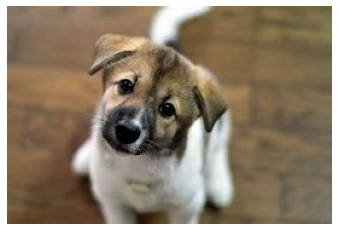

1/1 [==============================] - 0s 233ms/step
This is a dog


In [51]:
from PIL import Image
import matplotlib.pyplot as plt

#image diplay
image_path_dog = "C:\\Users\\rawat\\Downloads\\sample_dog.jpeg"  
img_dog = Image.open(image_path_dog)
plt.imshow(img_dog)
plt.axis('off') 
plt.show()

#caption
caption1 = generate_caption(image_path_dog)
print(caption1)